# Assignment 2

# 1. Regression

In this assignment, you will explore the California Housing Prices dataset. Your task is to apply various regression techniques, specifically Kernel Ridge Regression (KRR), Bayesian Linear Regression, and Gaussian Process Regression, to predict housing prices.


### Dataset
We will use the "California Housing Prices" dataset from the `sklearn.datasets` module for ease of access. 

### Objectives
1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Apply Kernel Ridge Regression (KRR) with different hyperparameters and analyze the results.
3. Implement Bayesian Linear Regression and discuss the posterior distributions.
4. Explore Gaussian Process Regression and visualize the prediction uncertainties.
5. Compare the performance of the three regression techniques and discuss your findings.



## Tasks

### 1. Data Exploration and Preprocessing
- Use the knowledge you gain from previouse assignment on this dataset. 
- You do not have to repeat the visualization of the data, only remeber the important fact that you gain by analysing it. 

#### 2. Kernel Ridge Regression (KRR)
- Apply KRR to the dataset.
- Experiment with different kernels and regularization parameters.
- Analyze the performance and discuss how different hyperparameters impact the model.

#### 3. Bayesian Linear Regression
- Implement Bayesian Linear Regression. You can use  Bayesian Ridge Regression function from Scikit-Learn.
- Visualize the posterior distributions of the coefficients (at least one coefficient).
- Discuss the insights gained from the posterior analysis.

#### 4. Gaussian Process Regression
- Apply Gaussian Process Regression to the dataset.
- Visualize the prediction uncertainties.
- Discuss how the Gaussian Process handles uncertainty in predictions.

#### 5. Comparative Analysis
- Compare the results obtained from KRR, Bayesian Linear Regression, and Gaussian Process Regression.
    - Visualize the regression fit provided by each model and compare.
    - Use at least one of the metrics: MSE, RMSE, R2
- Evaluate and discuss the performance, computational efficiency, and ease of interpretation of each model.
    - For Bayesian Linear Regression, analyze the posterior distributions of the coefficients. For KRR, discuss the interpretability of the kernel.



In [125]:
KernelRidge?

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the California Housing Prices dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, y_train.shape, X_train.values.shape

((16512, 8), (16512,), (16512, 8))

In [2]:
# Kernel Ridge Regression
krr_model = KernelRidge(kernel='rbf', alpha=1.0)
krr_model.fit(X_train_scaled, y_train)
y_pred_krr = krr_model.predict(X_test_scaled)



/Users/najmeh/miniconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [7]:
np.cov(X_data).shape

(16512, 16512)

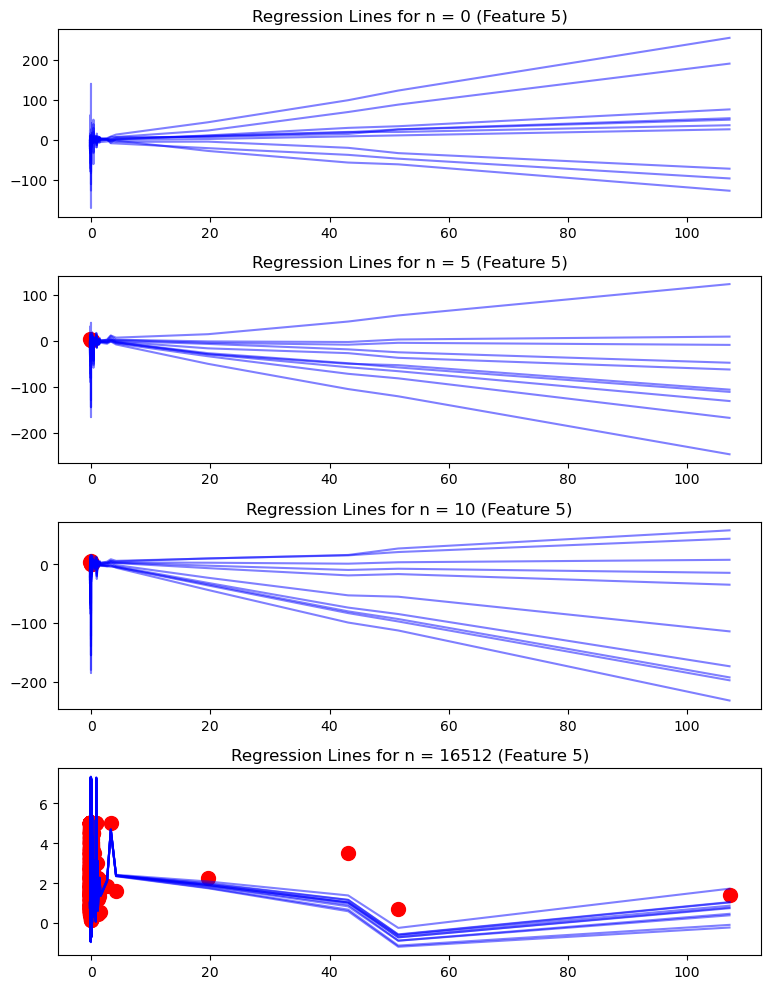

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_regression_lines(theta_samples, X, y, ax, feature_index=0, color='blue'):
    sorted_indices = np.argsort(X[:, feature_index])
    X_sorted = X[sorted_indices, feature_index]
    #print(np.min(X_sorted), np.max(X_sorted))
    for theta in theta_samples:
        y_vals = theta[0] + np.dot(X[sorted_indices], theta[1:])
        ax.plot(X_sorted, y_vals, color=color, alpha=0.5)
        #ax.set_xlim(-3, 4)

X_data = X_train_scaled
y_data = y_train


num_features = X_train_scaled.shape[1]
# Define the prior distribution for theta
theta_mean = np.zeros(num_features + 1)
theta_cov = np.eye(num_features + 1)


# Likelihood variance (assumed semi uninformative)
sigma_y = 0.5

# Bayesian updati

# Bayesian updating
fig = plt.figure(figsize=(15, 10))

steps = [0, 5, 10, X_data.shape[0]]

for i, step in enumerate(steps):


    if step > 0:
        X_step = X_data[:step]
        y_step = y_data[:step]

        # Design matrix with intercept term
        X_design = np.hstack([np.ones((X_step.shape[0], 1)), X_step])

        # Posterior update
        posterior_cov_inv = np.linalg.inv(theta_cov) + (1 / sigma_y**2) * X_design.T @ X_design
        posterior_cov = np.linalg.inv(posterior_cov_inv)
        posterior_mean = posterior_cov @ ((1 / sigma_y**2) * X_design.T @ y_step + np.linalg.inv(theta_cov) @ theta_mean)

        distribution = multivariate_normal(posterior_mean.flatten(), posterior_cov)
        theta_samples = distribution.rvs(10)
    else:
        distribution = multivariate_normal(theta_mean, theta_cov)
        theta_samples = distribution.rvs(10)

        theta_samples = distribution.rvs(10)


    # Plot regression lines for one feature
    feature = 5 # the feature to plot
    ax_regression = fig.add_subplot(len(steps), 2, 2 * i + 2)
    plot_regression_lines(theta_samples, X_data, y_data, ax_regression, feature_index=feature)
    ax_regression.scatter(X_data[:step, feature], y_data[:step], c='r', marker='o', s=100)  
    ax_regression.set_title(f"Regression Lines for n = {step} (Feature {feature})")

plt.tight_layout()
plt.show()


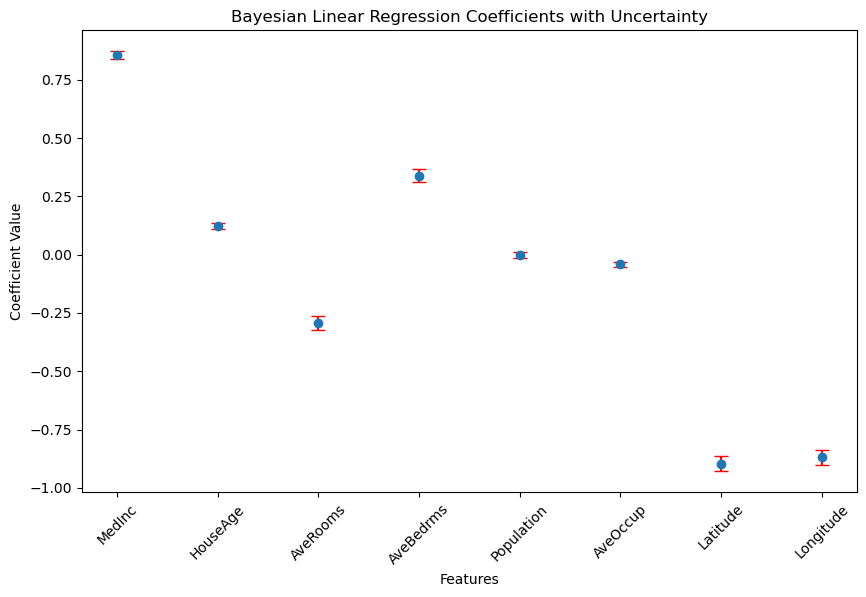

In [14]:
# Bayesian Linear Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_model.predict(X_test_scaled)


# Extract the standard deviation of the coefficients
std_dev_coef = np.sqrt(np.diag(bayesian_model.sigma_))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(bayesian_model.coef_)), bayesian_model.coef_,
             yerr=1.96*std_dev_coef, #  to approximate the 95% confidence interval for the coefficients.  95% of the values lie within approximately 1.96 standard deviations from the mean.(coefficient - 1.96 * std_dev)  
             fmt='o', 
             ecolor='r',
             capsize=5)
plt.xticks(range(len(bayesian_model.coef_)), data.feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Bayesian Linear Regression Coefficients with Uncertainty')
plt.show()

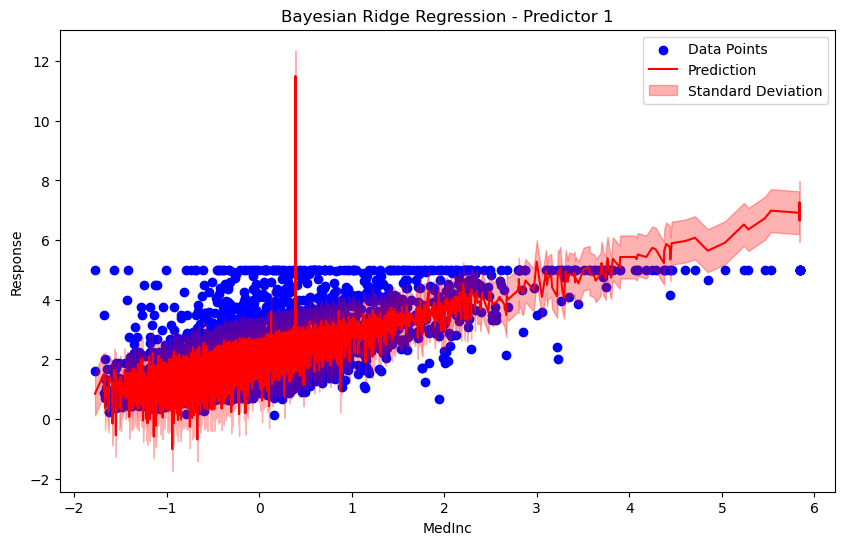

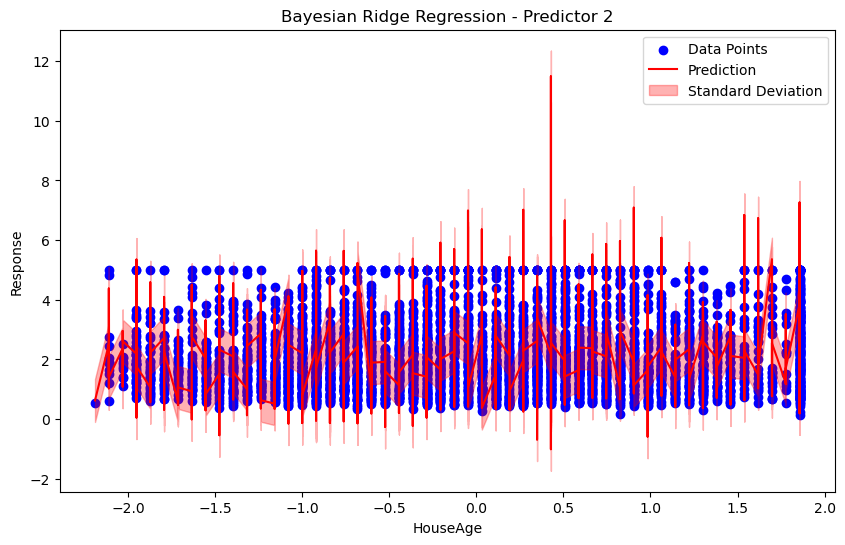

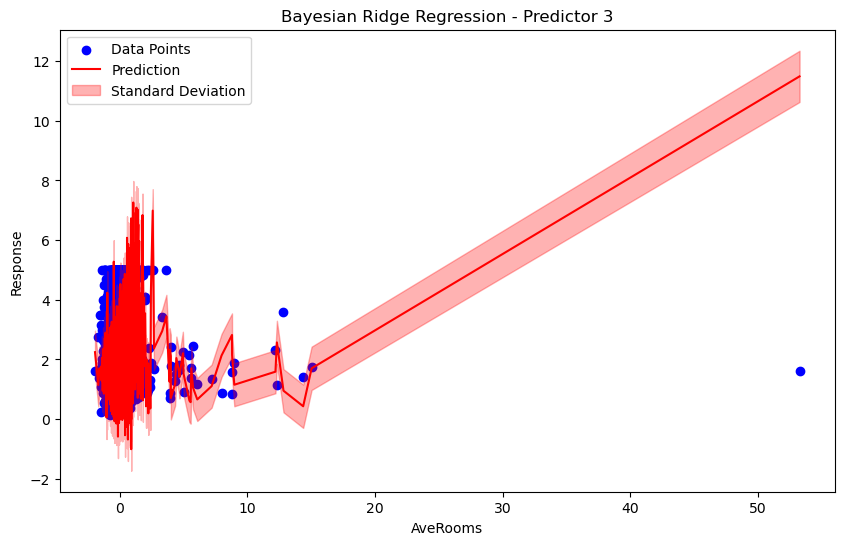

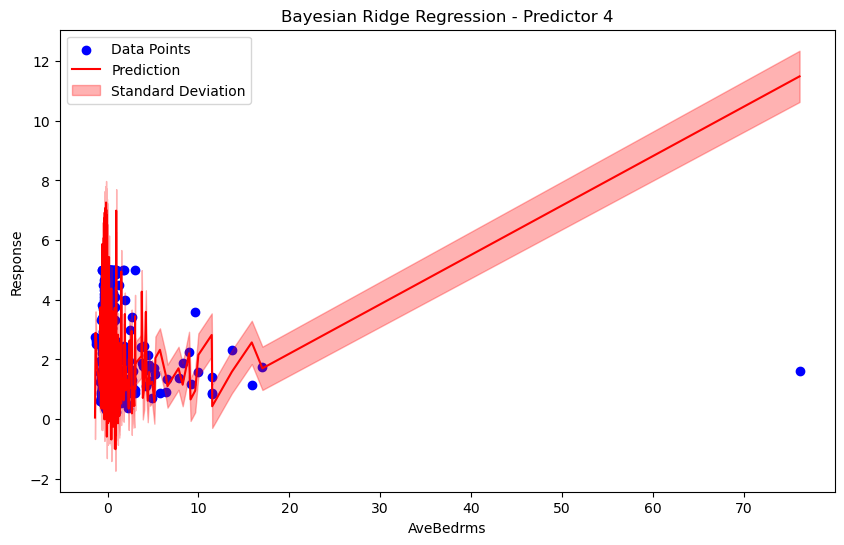

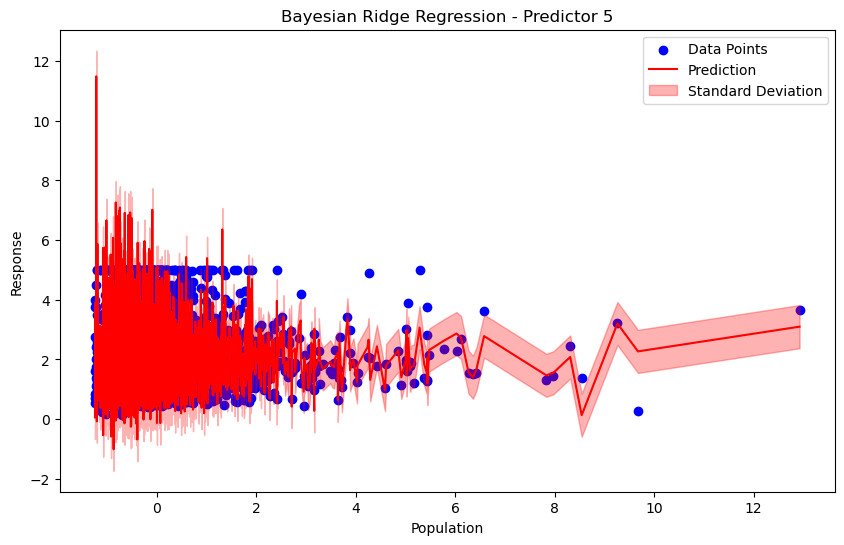

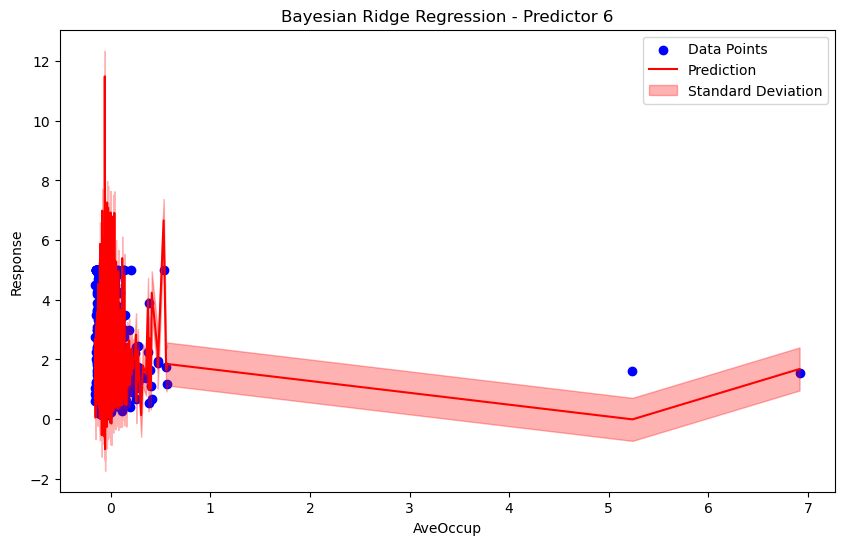

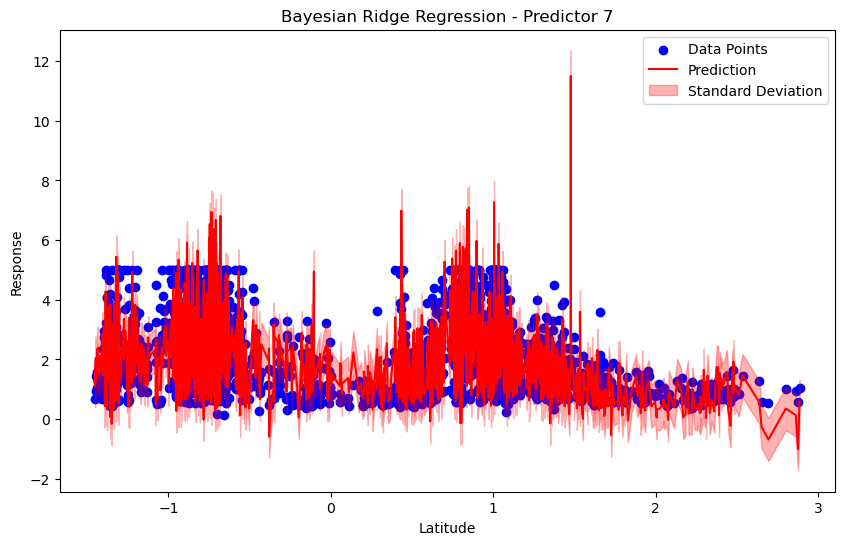

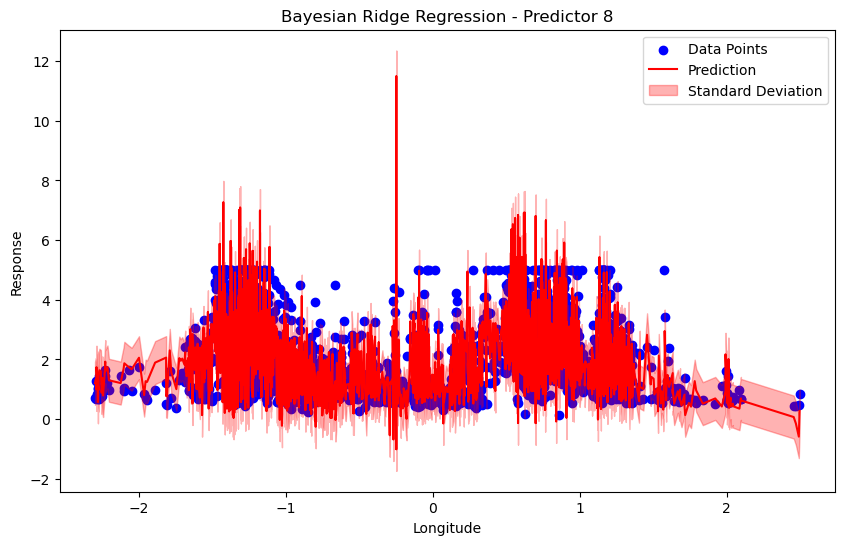

In [15]:
# Number of predictors
num_predictors = X_test_scaled.shape[1]

# Plot each predictor variable
for i in range(num_predictors):
    # Sort the predictor and get the sorted indices
    sorted_indices = np.argsort(X_test_scaled[:, i])
    X_sorted = X_test_scaled[sorted_indices, i]
    y_sorted = y_test[sorted_indices]

    # Predict using the model
    y_pred, y_std = bayesian_model.predict(X_test_scaled[sorted_indices], return_std=True)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_sorted, y_sorted, c='b', label='Data Points')
    plt.plot(X_sorted, y_pred, label='Prediction', color='r')
    plt.fill_between(X_sorted, y_pred - y_std, y_pred + y_std, alpha=0.3,color="red", label='Standard Deviation')
    plt.title(f'Bayesian Ridge Regression - Predictor {i+1}')
    plt.xlabel(data.feature_names[i])
    plt.ylabel('Response')
    plt.legend()
    plt.show()

### [List of possible kernels in sklearn](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html)

In [49]:
# Gaussian Process Regression
from sklearn.gaussian_process.kernels import Matern
Matern?

In [51]:
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 1.0), nu=1.5)
gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=42)


gpr_model.fit(X_train_scaled, y_train)
y_pred_gpr, std_dev_gpr = gpr_model.predict(X_test_scaled, return_std=True)


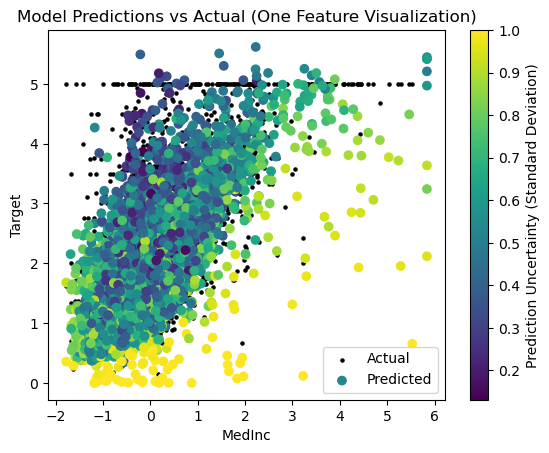

In [60]:
# Select one feature for visualization (for example, the first feature)
feature_index = 0
selected_feature = X_test_scaled[:, feature_index]

# Plot
plt.scatter(selected_feature, y_test, color='black', s = 5 ,label='Actual')

scatter = plt.scatter(selected_feature, y_pred_gpr,  c=std_dev_gpr, cmap='viridis', label='Predicted')
plt.colorbar(scatter, label='Prediction Uncertainty (Standard Deviation)')
plt.xlabel(data.feature_names[feature_index])
plt.ylabel('Target')
plt.title('Model Predictions vs Actual (One Feature Visualization)')
plt.legend()
plt.show()

In [38]:
# Evaluate the models
mse_krr = mean_squared_error(y_test, y_pred_krr)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
mse_gpr = mean_squared_error(y_test, y_pred_gpr)

r2_krr = r2_score(y_test, y_pred_krr)
r2_bayesian = r2_score(y_test, y_pred_bayesian)
r2_gpr = r2_score(y_test, y_pred_gpr)

# Display results
results = pd.DataFrame({
    'Model': ['Kernel Ridge Regression', 'Bayesian Linear Regression', 'Gaussian Process Regression'],
    'MSE': [mse_krr, mse_bayesian, mse_gpr],
    'R2 Score': [r2_krr, r2_bayesian, r2_gpr]
})

results



,Model,MSE,R2 Score
0,Kernel Ridge Regression,0.352829,0.730749
1,Bayesian Linear Regression,0.555831,0.575834
2,Gaussian Process Regression,0.391720,0.701070


# 2. Outlier detection
In this assignment, you can choose one of the below dataset and your task is to identify the outliers in them using various machine learning techniques.


## Dataset

You can choose One of the below datasets:
1. The dataset is a small sample from the Fashion MNIST dataset with manually added outliers. The data will be provided in the form of two numpy arrays: `images` and `labels`. (Note:check for missing data)
2. You will generate your data with outliers:
    * Use NumPy to create data points that follow a normal distribution. This forms the "normal" part of your dataset. 
    * Manually add data points that are significantly different from the normal data. 
    * These points should be distant from the mean of the normal data to be considered outliers.
    * Combine the normal data points and outliers into a single dataset.

### Objectives
1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Implement PCA (Principal Component Analysis) for dimensionality reduction and visualize the results.
3. Use K-means clustering to identify potential outliers.
4. Apply t-SNE (t-Distributed Stochastic Neighbor Embedding) for visualization and detect anomalies.
5. (Optional) Design and train an autoencoder and use reconstruction error to find outliers.
6. Compare the effectiveness of the above methods in outlier detection.





## Tasks

#### 1. Exploratory Data Analysis (EDA)
- Load the dataset and visualize some images.
- Plot the distribution of the different classes in the dataset.

#### 2. PCA for Dimensionality Reduction
- Implement PCA to reduce the dimensionality of the dataset.
- Visualize the data in the reduced dimension space.

#### 3. Choose one of the below tasks:
* QDA for Outlier Detection
    - Apply QDA  to the dataset.
    - Analyze how the QDA  decision boundary help in outlier detection.

* K-means Clustering
    - Apply K-means clustering on the dataset.
    - Identify clusters that potentially contain outliers.

#### 5. t-SNE for Visualization
- Apply t-SNE to the dataset and visualize the results.
- Discuss how t-SNE helps in identifying outliers.


#### 6. Autoencoder for Outlier Detection (Optional)
- Design and train an autoencoder on the dataset.
- Use the reconstruction error to identify images that are outliers.


#### 7. Comparative Analysis
- Compare the results of the models you chose to study.
- Discuss the effectiveness and limitations of each method in outlier detection.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


data = np.load('fmnist_710.npz')
images, labels  = data['x'] , data['y']

In [21]:
train_images = images.astype('float32') / 255


# Flatten images
X = train_images.reshape((train_images.shape[0], -1))


In [22]:
X.shape

(1210, 784)

In [121]:
# Apply PCA for Dimensionality Reduction and Outlier Detection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error_pca = np.sum((X - X_reconstructed) ** 2, axis=1)
outliers_pca = reconstruction_error_pca > np.percentile(reconstruction_error_pca, 95)

# Define the encoder
encoder = Sequential([
    Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(1e-4)),
    Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.2),
    Dense(2, activation='linear', name='encoder_layer')
])

# Define the decoder
decoder = Sequential([
    Dense(64, activation='relu'),
     tf.keras.layers.Dropout(0.2),
    Dense(784, activation='sigmoid')
])

autoencoder = Sequential([encoder, decoder]) #stack the encoder and decoder

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
                    loss='mse')

autoencoder.fit(X, X,                
                epochs=100, 
                batch_size=128,
                verbose=0)

# Detecting outliers with Autoencoder
predictions = autoencoder.predict(X)
mse = np.mean(np.power(X - predictions, 2), axis=1)
outliers_autoencoder = mse > np.percentile(mse, 95)



2023-12-08 09:59:27.969278: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


38/38 [==============================] - 0s 3ms/step


38/38 [==============================] - 0s 2ms/step


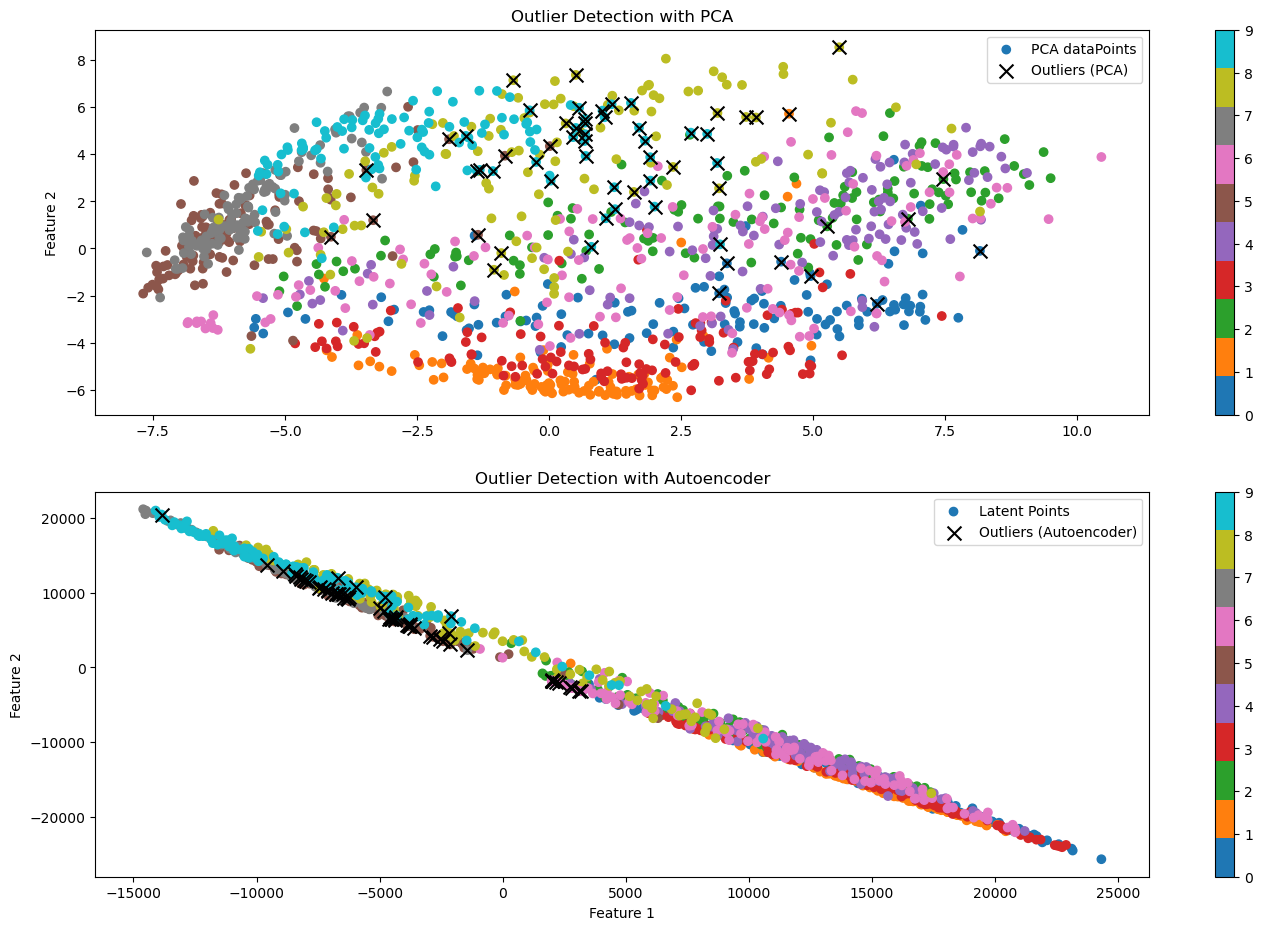

In [122]:
# Visualization
plt.figure(figsize=(17, 17))

# Visualization for PCA
plt.subplot(311)
p = plt.scatter(X_pca[:, 0], X_pca[:, 1],  c=labels, label='PCA dataPoints', cmap='tab10')
plt.scatter(X_pca[outliers_pca, 0], X_pca[outliers_pca, 1], c='k', marker='x', s=100,label='Outliers (PCA)')
plt.title('Outlier Detection with PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
cbar = plt.colorbar(p, orientation='vertical' )
plt.legend()

# Visualization for Autoencoder

z = encoder.predict(X)

plt.subplot(312)
p = plt.scatter(z[:, 0], z[:, 1], c = labels,  label='Latent Points', cmap='tab10')
plt.scatter(z[outliers_autoencoder, 0], z[outliers_autoencoder, 1], c='k', marker='x', s=100, label='Outliers (Autoencoder)')
plt.title('Outlier Detection with Autoencoder')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
cbar = plt.colorbar(p, orientation='vertical' )
plt.legend()


plt.show()

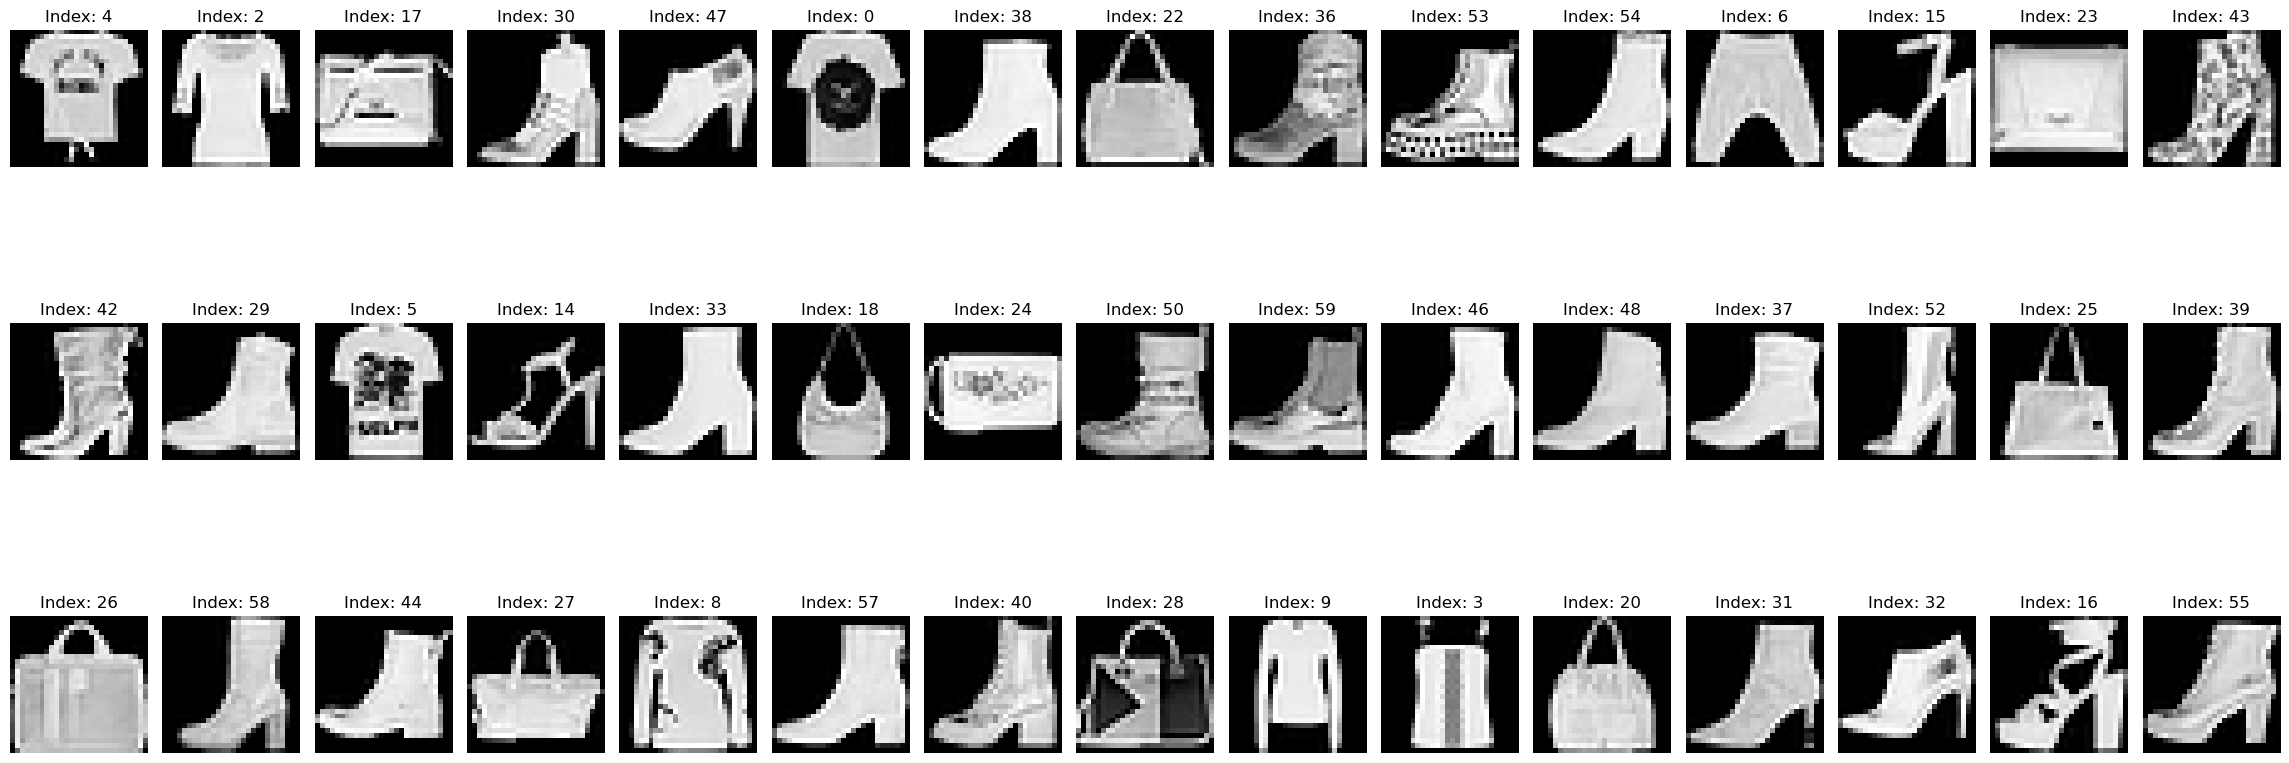

In [123]:
img = X[outliers_pca ]
indx = np.random.choice(range(img.shape[0]) , 45, replace =False)
plt.figure(figsize=(23, 10))
for i, idx in enumerate(indx):
    plt.subplot(3, 15, i + 1)
    plt.imshow(img[idx].reshape(28,28), cmap='gray')
    plt.title(f"Index: {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()

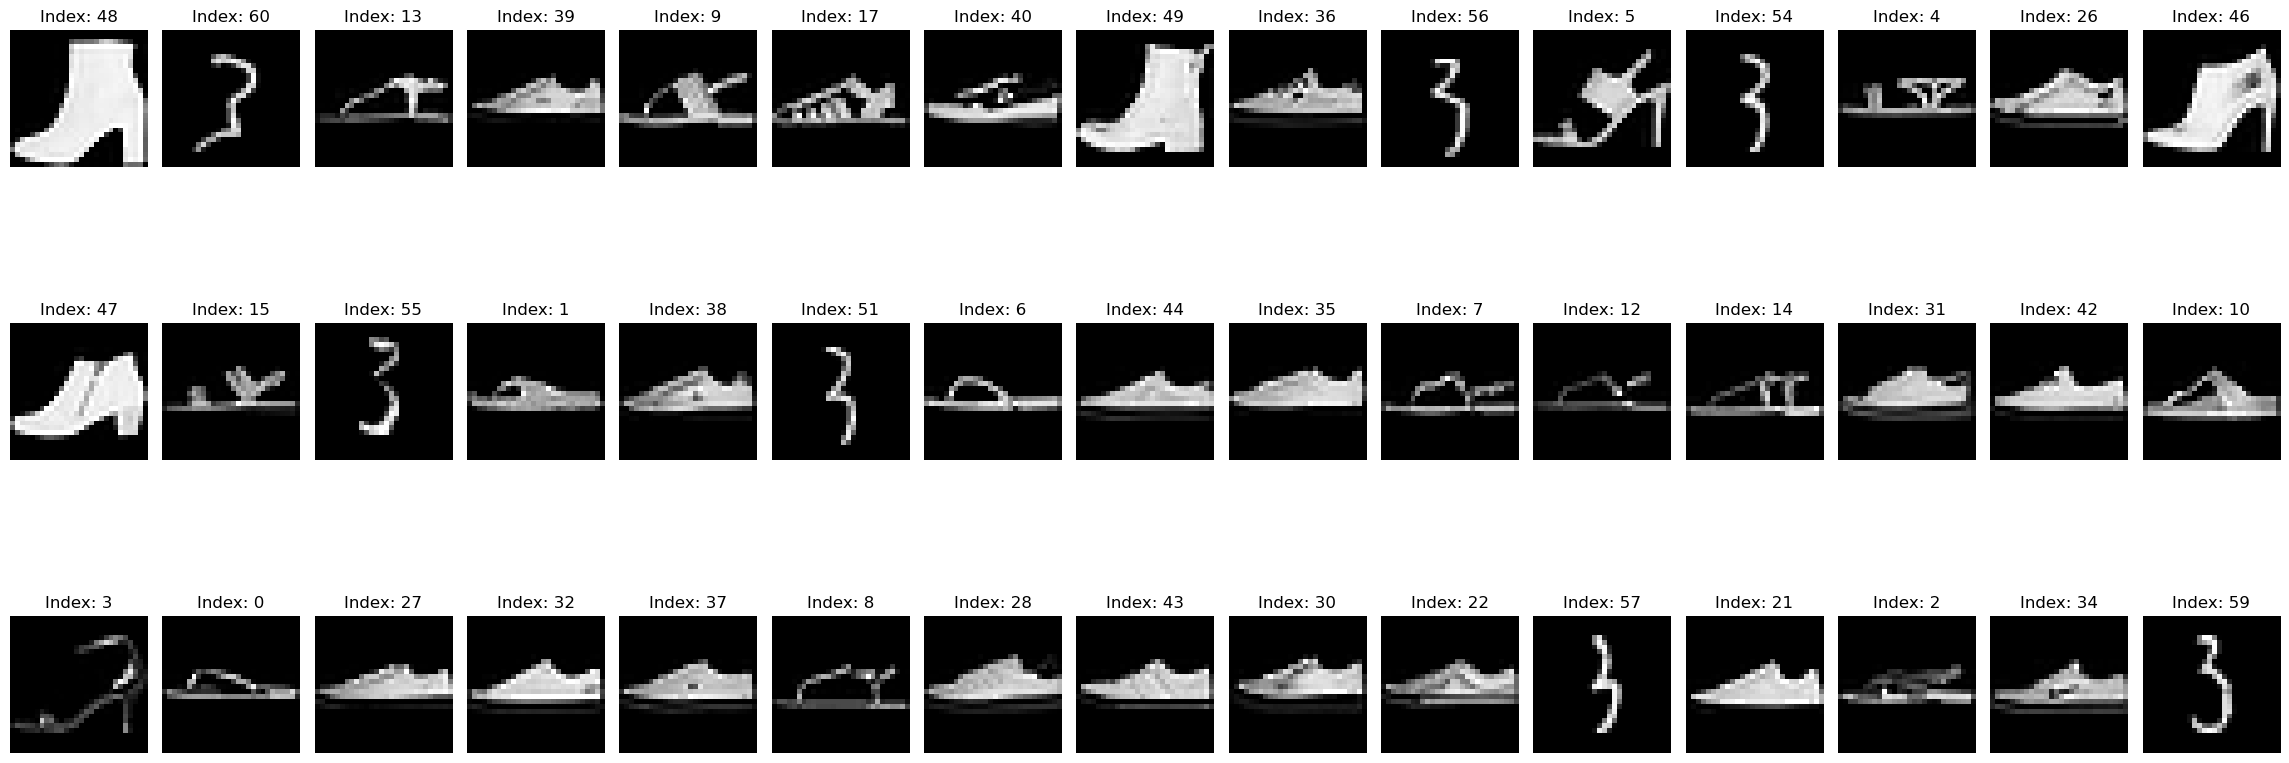

In [124]:
img = X[outliers_autoencoder]
indx = np.random.choice(range(img.shape[0]) , 45, replace =False)
plt.figure(figsize=(23, 10))
for i, idx in enumerate(indx):
    plt.subplot(3, 15, i + 1)
    plt.imshow(img[idx].reshape(28,28), cmap='gray')
    plt.title(f"Index: {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()

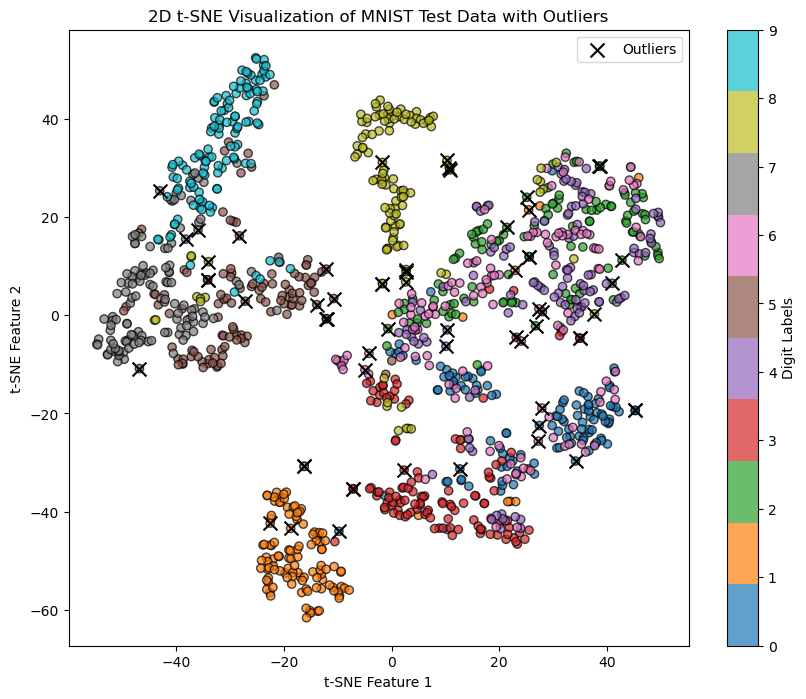

In [96]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, 
            perplexity=15,
            n_iter=1000, random_state=42)

X_tsne = tsne.fit_transform(X)  # Using a subset for quicker execution



# Outlier Detection: Calculate the distance from each point to its neighbors
distances = np.sqrt(((X_tsne[:, np.newaxis, :] - X_tsne[np.newaxis, :, :]) ** 2).sum(axis=2)) # computes the distance between each pair 
k_nearest_distances = np.sort(distances, axis=1)[:, 1:6]  # selects the distances to the five nearest points (excluding the distance to the point itself, which is zero).
outlier_scores = k_nearest_distances.mean(axis=1) #The mean distance to these nearest point
outliers = outlier_scores > np.percentile(outlier_scores, 95)  # Top 5% as outliers

# 2D Visualization of t-SNE results with Outliers
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels,
            cmap='tab10',
            edgecolor='k', alpha=0.7)
plt.scatter(X_tsne[outliers, 0], X_tsne[outliers, 1], c='k', marker='x', s=100, label='Outliers')
plt.title('2D t-SNE Visualization of MNIST Test Data with Outliers')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(scatter, label='Digit Labels')
plt.legend()
plt.show()



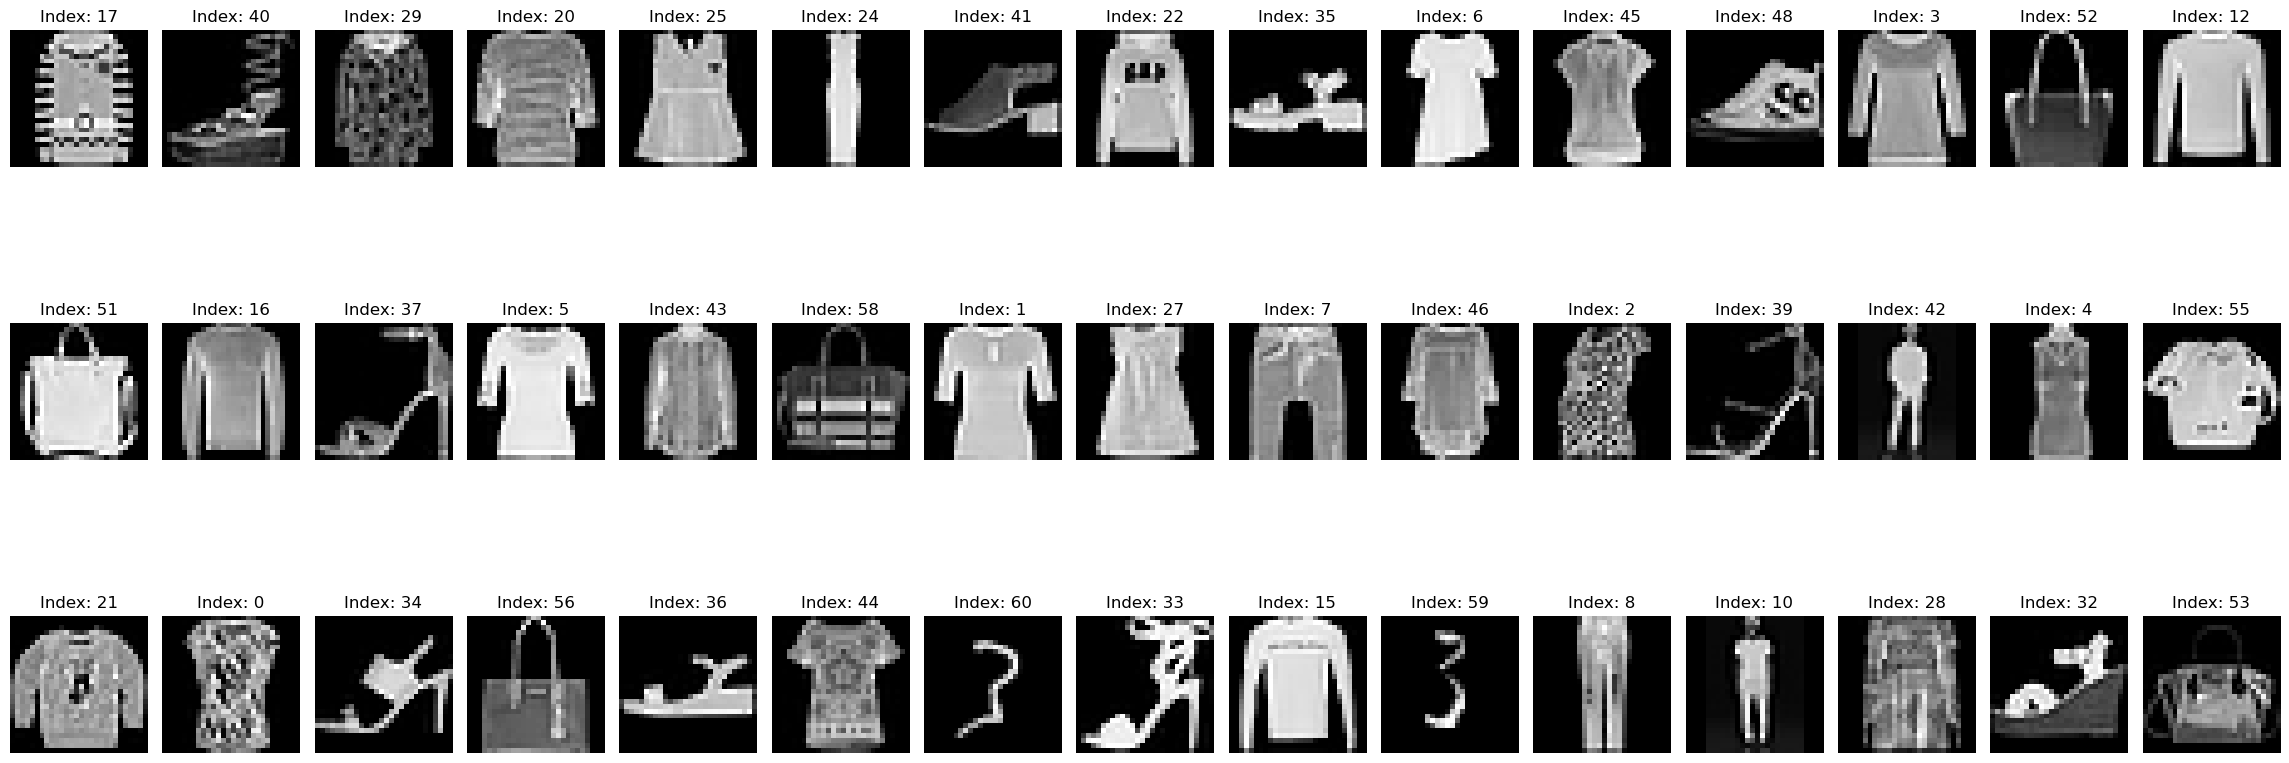

In [100]:
img = X[outliers]
indx = np.random.choice(range(img.shape[0]) , 45, replace =False)
plt.figure(figsize=(23, 10))
for i, idx in enumerate(indx):
    plt.subplot(3, 15, i + 1)
    plt.imshow(img[idx].reshape(28,28), cmap='gray')
    plt.title(f"Index: {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()